## Scipy 시작!

In [299]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


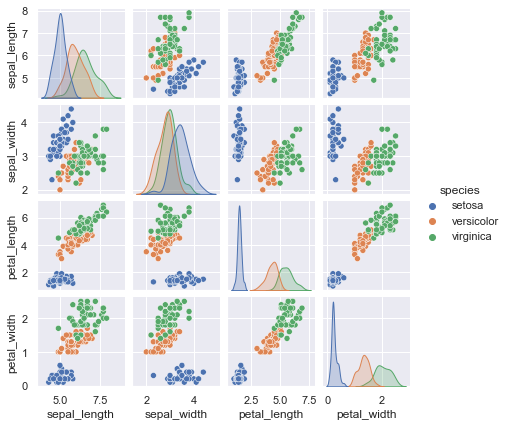

In [300]:
import matplotlib.pyplot as plt
%matplotlib inline

sns.pairplot(iris, hue='species', size = 1.5);

In [301]:
X_iris = iris.drop('species',axis=1)
X_iris.shape
X_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [302]:
Y_iris = iris['species']
Y_iris.shape

(150,)

# 지도 학습 예제: 간단한 선형 회귀

In [303]:
import matplotlib.pyplot as plt
import numpy as np

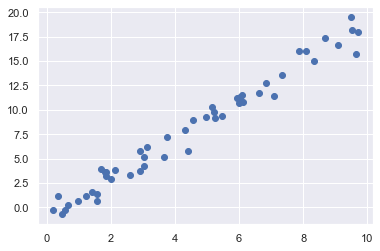

In [304]:
rng = np.random.RandomState(42)
x = 10*rng.rand(50)
y = 2*x-1+rng.randn(50)

plt.scatter(x, y)

In [305]:
from sklearn.linear_model import LinearRegression

In [306]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [307]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [308]:
model.fit(X,y)

LinearRegression()

In [309]:
model.coef_

array([1.9776566])

In [310]:
model.intercept_

-0.9033107255311146

In [311]:
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

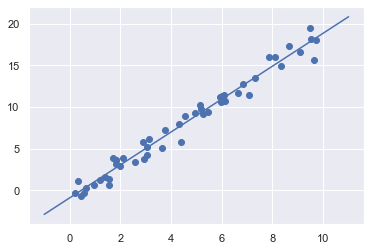

In [312]:
plt.scatter(x,y)
plt.plot(xfit, yfit)

In [313]:
from sklearn.decomposition import PCA

model = PCA(n_components = 2)
model.fit(X_iris)
X_2D = model.transform(X_iris)


In [314]:
print(X_2D)

[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]
 [-2.50694709  0.6450689 ]
 [-2.61275523  0.01472994]
 [-2.78610927 -0.235112  ]
 [-3.22380374 -0.51139459]
 [-2.64475039  1.17876464]
 [-2.38603903  1.33806233]
 [-2.62352788  0.81067951]
 [-2.64829671  0.31184914]
 [-2.19982032  0.87283904]
 [-2.5879864   0.51356031]
 [-2.31025622  0.39134594]
 [-2.54370523  0.43299606]
 [-3.21593942  0.13346807]
 [-2.30273318  0.09870885]
 [-2.35575405 -0.03728186]
 [-2.50666891 -0.14601688]
 [-2.46882007  0.13095149]
 [-2.56231991  0.36771886]
 [-2.63953472  0.31203998]
 [-2.63198939 -0.19696122]
 [-2.58739848 -0.20431849]
 [-2.4099325   0.41092426]
 [-2.64886233  0.81336382]
 [-2.59873675  1.09314576]
 [-2.63692688 -0.12132235]
 [-2.86624165  0.06936447]
 [-2.62523805  0.59937002]
 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


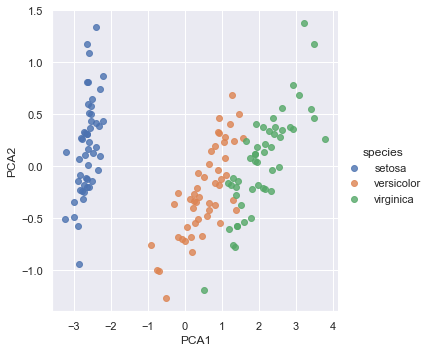

In [315]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]

sns.lmplot('PCA1','PCA2', hue='species', data=iris, fit_reg=False);

In [316]:
## holdout set (홀드아웃 검증) : training set 에서 일부 데이터를 빼서, validation set 으로 이용하여 검증

In [317]:
## underfit (과소적합) --> 고편향
## overfit (과적합) --> 고분산 

In [318]:
## sklearn 의 검증 곡선

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))


In [319]:
import numpy as np
def make_data(N, err=1.0, rseed = 1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N,1) ** 2
    y = 10-1./(X.ravel()+0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y
X, y = make_data(40)

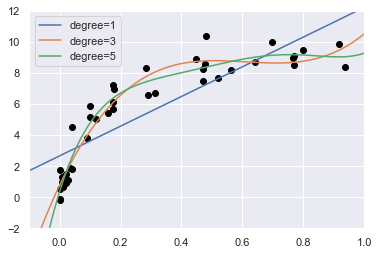

In [320]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color = 'black')
axis = plt.axis()
for degree in [1,3,5]:
    y_test = PolynomialRegression(degree).fit(X,y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label = 'degree={0}'.format(degree))

plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc = 'best')

## 유방암 진단 데이터 세트로 머신러닝 기초 코딩

In [321]:
# 기초 애들
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## sklearn 데려오기
from sklearn.model_selection import train_test_split # train, test data 분리 
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict # cross validation 
from sklearn import metrics # metrics 확인용

## 사용할 머신러닝 기법들

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier



In [322]:
data = pd.read_csv('data.csv')

data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [323]:
data.info() # data 가공을 위해 확인 
# unnamed 랑 id는 불필요하니까 삭제 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Refine data 
'id'와 'Unnamed'는 불필요하므로 삭제

In [324]:
data.drop(['id','Unnamed: 32'], axis = 1, inplace = True)

'''
Benign: 양성 (0)
Malignant: 음성 (1) 
로 대체해 주자
'''

data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})


In [325]:
# refined data confirm 
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [326]:
data.describe()
## data set 개요 확인 

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

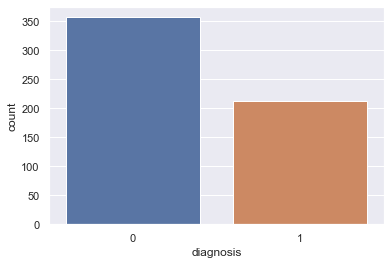

In [327]:
sns.countplot(data['diagnosis']) ## 좀 데이터가 기울어지면 의미 없어서.. 일단 진행 

## train / test set 구분 시작

In [328]:
train, test = train_test_split(data, test_size = 0.2, random_state=2019) # random state 는 안적어도 되고, test size 0.2 는 20% 가 test set

x_train = train.drop(['diagnosis'], axis = 1)
y_train = train.diagnosis

x_test = test.drop(['diagnosis'], axis = 1)
y_test = test.diagnosis

print(len(train), len(test))

455 114


# SVM 사용

In [329]:
model = svm.SVC(gamma = 'scale')
model.fit(x_train, y_train) # x / y 로 넣어서 모델 핏

y_pred = model.predict(x_test) # model 검증 

print('SVM: %.2f' % (metrics.accuracy_score(y_pred, y_test) * 100)) # y pred - y test를 통해 몇 프로인지 확인 
# 악성인지 양성인지 구분할 수 있는 정확도가 91.23 % 

SVM: 91.23


## DecisionTreeClassifier

In [330]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test) 

print('DTC: %.2f' % (metrics.accuracy_score(y_pred, y_test) * 100))

DTC: 89.47


## KNeighborsClassifier

In [331]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test) 

print('KNeighborsClassifier: %.2f' % (metrics.accuracy_score(y_pred, y_test) * 100))

KNeighborsClassifier: 92.98


## LogisticRegression

In [332]:
model = LogisticRegression(solver = 'lbfgs', max_iter=2000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test) 

print('LogisticRegression: %.2f' % (metrics.accuracy_score(y_pred, y_test) * 100))

LogisticRegression: 94.74


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## RandomForestClassifier

In [333]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)

y_pred = model.predict(x_test) 

print('RandomForestClassifier: %.2f' % (metrics.accuracy_score(y_pred, y_test) * 100))

RandomForestClassifier: 95.61


## Compute feature importances 

어느 feature가 중요한 지 알아내자. 너무 많은 feature가 있어서 ..

In [334]:
features = pd.Series(
    model.feature_importances_,
    index=x_train.columns
).sort_values(ascending = False)

features 

concave points_worst       0.164447
perimeter_worst            0.129997
area_worst                 0.101630
radius_worst               0.081098
concave points_mean        0.074897
perimeter_mean             0.060530
area_se                    0.059370
concavity_mean             0.058959
area_mean                  0.054329
concavity_worst            0.048031
radius_mean                0.029998
perimeter_se               0.014060
texture_worst              0.012857
compactness_worst          0.011211
radius_se                  0.010179
symmetry_worst             0.009735
texture_mean               0.008836
compactness_mean           0.008380
concave points_se          0.008266
smoothness_mean            0.007807
smoothness_worst           0.006746
smoothness_se              0.005917
fractal_dimension_worst    0.005845
fractal_dimension_mean     0.005702
compactness_se             0.004502
concavity_se               0.004000
symmetry_se                0.003685
fractal_dimension_se       0

In [335]:
## 상위 5개 feature만 가지고 다시 모델링

top_5_features = features.keys()[:5]

top_5_features

Index(['concave points_worst', 'perimeter_worst', 'area_worst', 'radius_worst',
       'concave points_mean'],
      dtype='object')

## SVM top 5

In [336]:
model = svm.SVC(gamma = 'scale') 
model.fit(x_train[top_5_features], y_train)

y_pred = model.predict(x_test[top_5_features])

print('SVM(Top5): %.2f' % (metrics.accuracy_score(y_pred, y_test)*100))

SVM(Top5): 91.23



# Cross validation (Tedius)

In [337]:
model = svm.SVC(gamma = 'scale') 

cv = KFold(n_splits = 5) # n_split 은 몇 개의 iteration ? 알아서 분리해 줌 5개에 split된 데이터로 교차검증 

accs, scores = [], []

for train_index, test_index in cv.split(data[top_5_features]):
    x_train = data.iloc[train_index][top_5_features]
    y_train = data.iloc[train_index].diagnosis
    
    x_test = data.iloc[test_index][top_5_features]
    y_test = data.iloc[test_index].diagnosis
    
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    accs.append(metrics.accuracy_score(y_test, y_pred))
    
print(accs)

[0.7807017543859649, 0.8947368421052632, 0.9736842105263158, 0.9298245614035088, 0.9380530973451328]


In [338]:
model = svm.SVC(gamma = 'scale')

cv = KFold(n_splits = 5)

accs = cross_val_score(model, data[top_5_features], data.diagnosis, cv = cv)

print(accs)

[0.78070175 0.89473684 0.97368421 0.92982456 0.9380531 ]


# Test all models

In [339]:
models = {
    'SVM': svm.SVC(gamma = 'scale'),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver = 'lbfgs', max_iter = 2000),
    'RandomForestClassifier': RandomForestClassifier(n_estimators = 200)
}

cv = KFold(n_splits = 6)

for name, model in models.items():
    scores = cross_val_score(model, data[top_5_features], data.diagnosis, cv = cv)
    
    print('%s: %.2f%%' % (name, np.mean(scores)*100))
    

SVM: 90.87%
DecisionTreeClassifier: 92.44%
KNeighborClassifier: 88.76%
LogisticRegression: 90.34%
RandomForestClassifier: 93.68%


# Normalize Dataset

In [340]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1)) # scale을 min - max 0 - 1 로 노멀화 해줌 
scaled_data = scaler.fit_transform(data[top_5_features])


models = {
    'SVM': svm.SVC(gamma = 'scale'),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver = 'lbfgs', max_iter = 2000),
    'RandomForestClassifier': RandomForestClassifier(n_estimators = 200)
}

cv = KFold(n_splits = 6)

for name, model in models.items():
    scores = cross_val_score(model, data[top_5_features], data.diagnosis, cv = cv)
    
    print('%s: %.2f%%' % (name, np.mean(scores)*100))
    
    #엄청 달라지진 않네..

SVM: 90.87%
DecisionTreeClassifier: 92.26%
KNeighborClassifier: 88.76%
LogisticRegression: 90.34%
RandomForestClassifier: 94.03%


## 타이타닉 데이터를 이용한 분석

In [341]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [342]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# data dictionary

- survived: 0 = No, 1 = Yes
- pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
- sibsp: # of siblings / spouses aboard the Titanic
- parch: # of parents / children aboard the Titanic
- ticket : Ticket number
- cabin : Cabin number
- embarked : Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [343]:
test.head() # survived 가 없는데, 그건 train 통해 test에서 survived 알아내려고

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [344]:
train.shape

(891, 12)

In [345]:
test.shape

(418, 11)

In [346]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [347]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [348]:
## 빠진 정보 찾는 법

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [349]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### titanic visualization

In [350]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

# bar chart for categorical features 
- Pclass
- Sex
- SibSp (# of siblings and spouse)
- parch (# of parents and children)
- Embarked
- Cbain

In [351]:
def bar_chart(feature): 
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived' , 'Dead']
    df.plot(kind = 'bar', stacked = 'True', figsize = (10,5))
    

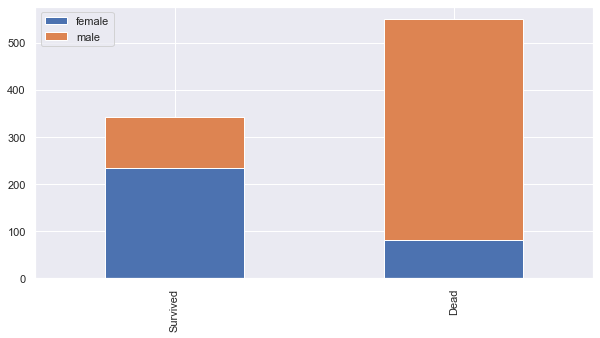

In [352]:
bar_chart('Sex')

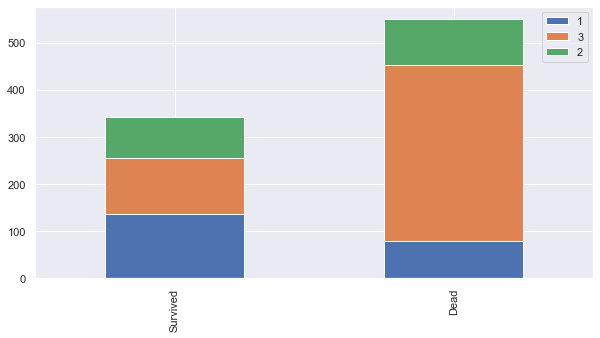

In [353]:
bar_chart('Pclass')

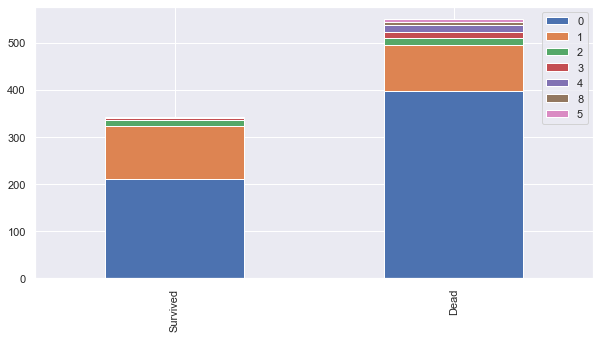

In [354]:
bar_chart('SibSp')

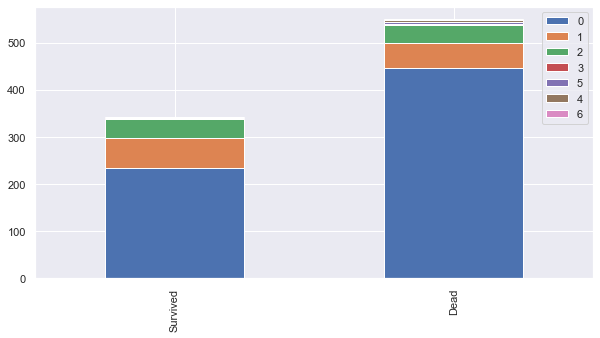

In [355]:
bar_chart('Parch')

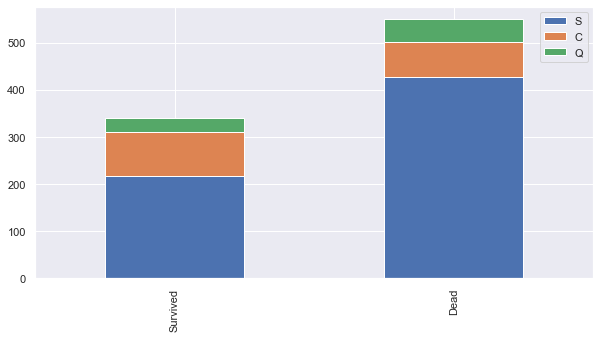

In [356]:
bar_chart('Embarked')

## Feature engineering ! most important

feature engineering is the process of using domain knowledge of the data to creat features (feature vectors) that make machine learning algorithms work. 

feature vector is an n-dimensional vector of numerical features that represent some object.
Many algorithms in machine learning require a numerical representation of objects,
since such representations facilitate processing and statistical analysis.


In [357]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [358]:
## Titanic은 앞에 박았으니, 3rd class 가 먼저 죽었음. 이런걸 바탕으로 구분

## Name feature 
이름보다, Mr, 인지 Mrs. 이런걸 추출해서 확인 

In [359]:
train_test_data = [train, test] # combining train and test dataset 

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

In [360]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [361]:
title_mapping = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Dr': 3, 'Rev': 3, 'Col': 3, 'Major': 3,
                 'Mile': 3, 'Countess': 3, 'Ms': 3, 'Lady':3, "Jonkheer":3, 'Dona': 3, 'Mme':3, 'Capt':3, 'Sir':3}

for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [362]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [363]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


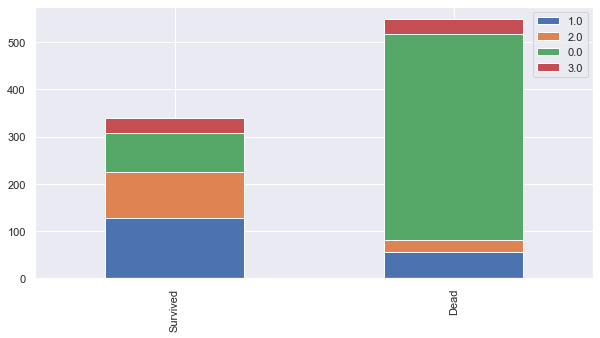

In [364]:
bar_chart('Title')

In [365]:
train.drop('Name', axis = 1, inplace = True)
test.drop('Name', axis = 1, inplace = True)

In [366]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


## Sex feature

In [367]:
sex_mapping = {'male': 0, 'female': 1}

for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [368]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0.0


In [369]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2


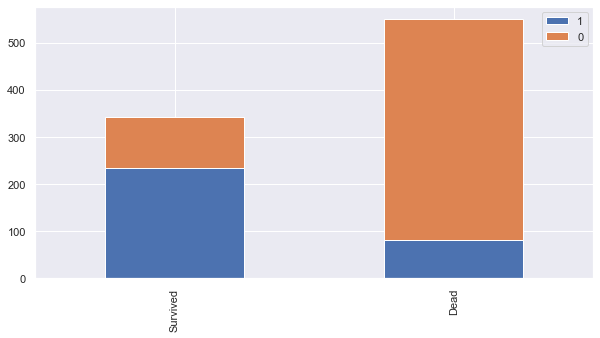

In [370]:
bar_chart('Sex')

# Age feature

In [371]:
train.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,NaN,0,0,374910,8.0500,NaN,S,0.0
96,97,0,1,0,71.0,0,0,PC 17754,34.6542,A5,C,0.0
97,98,1,1,0,23.0,0,1,PC 17759,63.3583,D10 D12,C,0.0
98,99,1,2,1,34.0,0,1,231919,23.0000,NaN,S,2.0


In [372]:
## 단순 평균보다, Mrs의 평균, Mr의 평균 등 각각에 따른 분석해서 NaN 채우기

train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace = True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace = True)

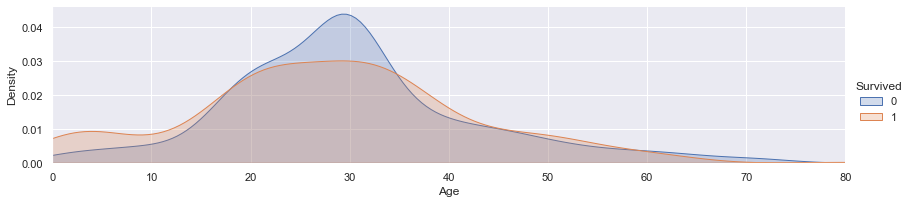

In [373]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim = (0, train['Age'].max()))
facet.add_legend()

plt.show()

(0.0, 20.0)

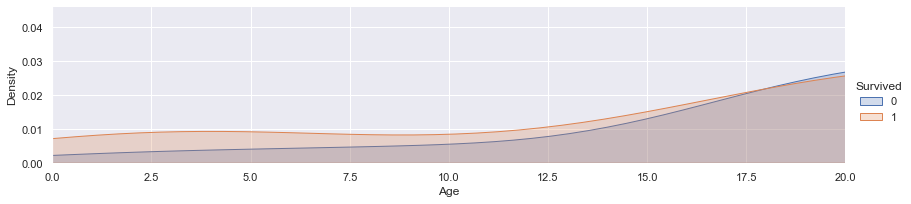

In [374]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim = (0, train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

(20.0, 30.0)

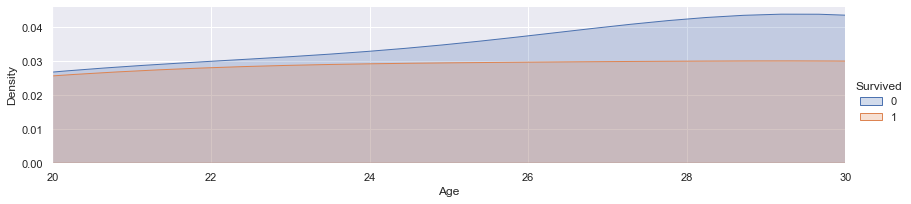

In [375]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim = (0, train['Age'].max()))
facet.add_legend()
plt.xlim(20, 30)

In [376]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    21.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

## Bining 
sequential info 를 categorical로 ! 

feature vector map:

child = 0
young = 1
adult = 2
mid-age = 3
senior = 4

--> pandas 1.3.4 에서 기존 방식 적용 안되어 그냥 age ignore

In [377]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age']) > 16 & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age']) > 26 & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age']) > 36 & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[(dataset['Age']) > 62, 'Age'] = 4

ValueError: Must have equal len keys and value when setting with an iterable

## Embarked 

filling missing values

In [379]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0.0


<AxesSubplot:>

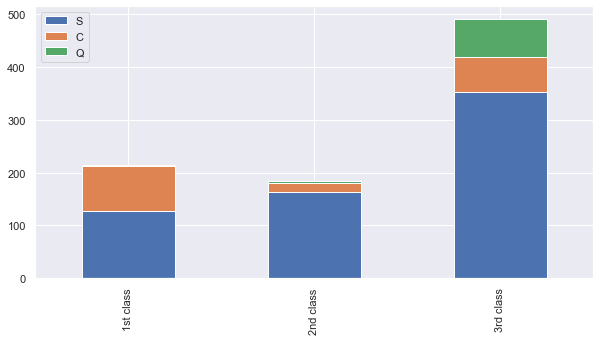

In [380]:
Pclass1 = train[train['Pclass'] == 1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass'] == 3]['Embarked'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind = 'bar', stacked = True, figsize = (10,5))

# 얘도 안먹네..

In [381]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [382]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0.0


In [383]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [384]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,2.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0,2.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0,0.0


# # Fare

In [385]:
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace = True)


In [386]:
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace = True)

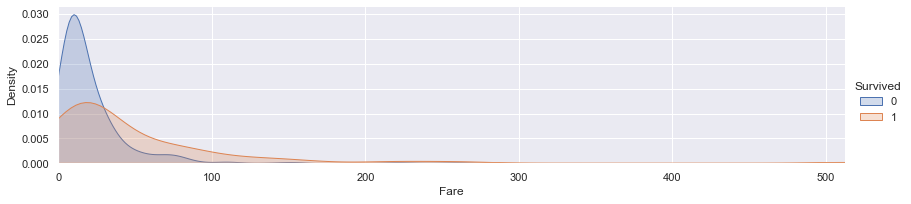

In [387]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Fare', shade = True)
facet.set(xlim = (0, train['Fare'].max()))
facet.add_legend()

plt.show()

# Cabin ..

숫자는 어려워서 character만